# Understanding CO2 Emissions for 2022 Vehicles
### Dil Dhaliwal 191714630
### Kanav Kaura 190671410

## Introduction and Motivation

Most agree that global warming and climate change are increasingly urgent problems that are heavily impacting our environment. One of the largest contributors to these problems are greenhouse gas emissions (GHG). In Canada, vehicles account for over 10% of total GHG. There are efforts to reduce them with hybrid and electric vehicles, however, majority of vehicles on the road and being purchased are still gasoline powered and produce CO2. Vehicles' high CO2 emissions are extremely harmful. Our motivation is to inform buyers about which automakers and vehicle types tend to create the most/least CO2. They can then make better decisions when selecting a vehicle to purchase, consequently, reducing their carbon footprint and saving money on gasoline. 

## Which vehicle types produce the most CO2 emissions? Which vehicle makers are creating these high emission vehicles?

### Three Part Query
We are looking at the make and type of vehicles made in 2022 to find out how these features relate to the CO2 emissions vehicles are producing in order for my audience to make informed decisions when buying new vehicles that will reduce their carbon footprint and save gasoline.

### KWL
We Know that vehicles produce CO2 emissions. We Want to learn which vehicle types and companies produce the most CO2 emissions. We have Learned which vehicle types (Minicompact, Full-size, etc) and companies (Dodge, GMC, Land Rover, etc) produce more CO2 emissions.

In [194]:
#for data manipulation
import pandas as pd, numpy as np, random

#for graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '16'

#for math
import math
import random

## Data Set Description

The data set was retrieved from the Government of Canada website under Fuel consumption ratings. It is titled 2022 Fuel Consumption Ratings (2023-02-03). The source URL is https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2022%20Fuel%20Consumption%20Ratings.csv. It contains 959 rows/vehicles and 15 columns/features. Some notable features are make, vehicle class, and CO2 emissions. 


In [205]:
#Import dataset
df = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

## Data Processing

The data set must be processed to make it useful in answering our question. The first step we took was examining the data set for problematic data which we deleted from the bottom. We then converted the data set into UTF-8 format to simplify the import. Next we narrowed the columns/features to only the ones we needed to use which were make, vehicle class, and CO2 emissions. We then dropped unimportant or infrequent vehicle classes such as station wagons and special purpose vehicles. We also dropped instances of luxury cars because we are more concerned with vehicles that are frequently bought and affordable for the average buyer. 


In [196]:
#Take important columns
df = df[['Make', 'Vehicle Class', 'CO2 Emissions (g/km)']]
#Take important rows
df = df[(df['Vehicle Class'] != 'Special purpose vehicle') & (df['Vehicle Class'] != 'Station wagon: Small') & (df['Vehicle Class'] != 'Station wagon: Mid-size')]
df = df[(df['Make'] != 'FIAT') & (df['Make'] != 'Bugatti') & (df['Make'] != 'Aston Martin') & (df['Make'] != 'Alfa Romeo') & (df['Make'] != 'Lamborghini') & (df['Make'] != 'Rolls-Royce') & (df['Make'] != 'Maserati') & (df['Make'] != 'Jaguar') & (df['Make'] != 'Bentley') & (df['Make'] != 'Genesis') & (df['Make'] != 'Porsche') & (df['Make'] != 'Lincoln') & (df['Make'] != 'Cadillac') & (df['Make'] != 'Buick') & (df['Make'] != 'Volvo')]

## Data Analysis: Proportions of Vehicle Class

The first visualization we created is a pie chart that shows the proportions of different vehicle classes in the data set. It is clear that SUVs, standard pick up trucks, midsizes, subcompact, and compacts make up majority of the data set and are commonly manafactured vehicles in 2022. This is important to visualize and will be useful later when we see which vehicle classes produce more CO2 emissions than others.

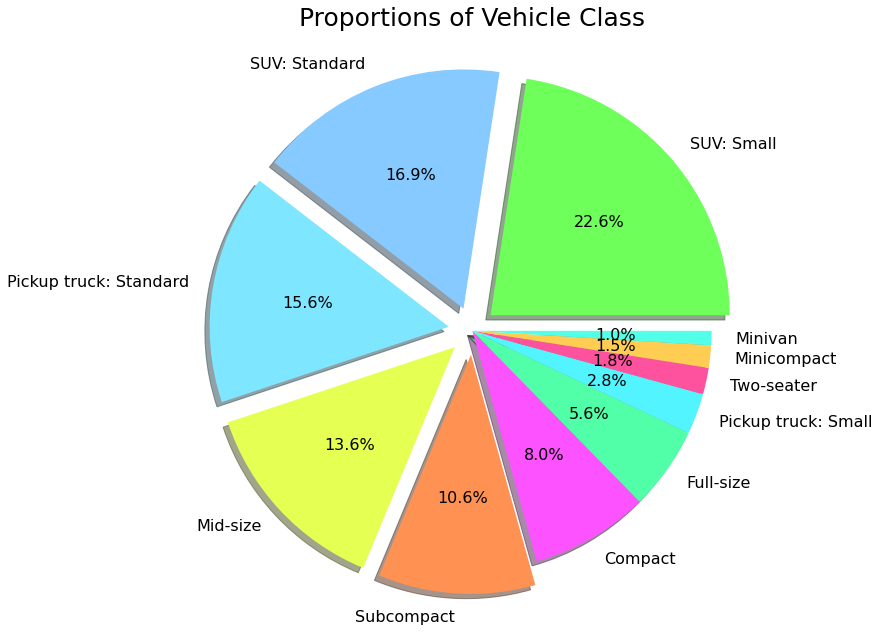

In [197]:
vc_count = df['Vehicle Class'].value_counts()
c = ['#6EFF5A', '#86CAFF','#7EE6FF', '#E5FF52','#FF9152', '#FC52FF','#52FFA9', '#52F5FF','#FF529E', '#FFCD52','#52FFE7'] 
vc_count.plot(kind = 'pie', colors = c, figsize = (11, 11), autopct = '%1.1f%%', ylabel = '', shadow = True, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0))
plt.title("Proportions of Vehicle Class", fontsize = 25)
plt.yticks(fontsize = 40)
plt.show()

## Data Analysis: Proportions of Vehicle Make

The second visualization we created is a horizontal bar chart that shows the proportions of different vehicle makes in the data set. Some notable vehicle makes are Ford, Chevrolet, BMW, GMC, and a few others that seem to manufacture many different vehicles. This is important to visualize and will be useful later when we see which vehicle makers make vehicles with high CO2 emissions.

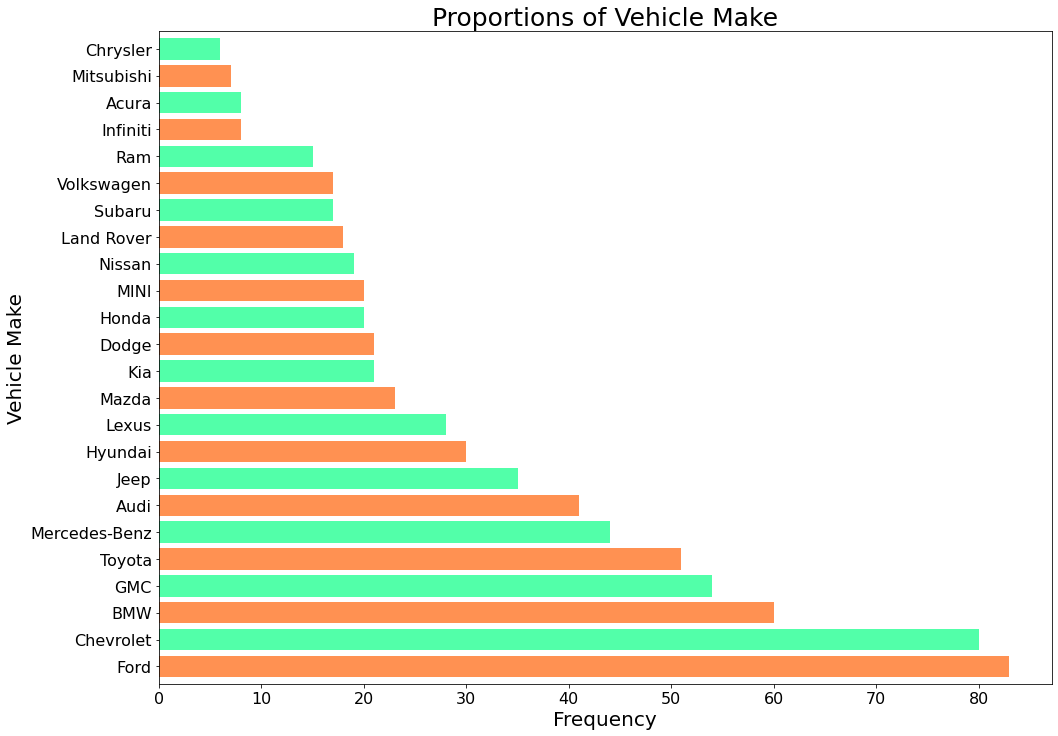

In [198]:
m_count = df['Make'].value_counts()
c = ['#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9', '#FF9152', '#52FFA9'] 
m_count.plot(kind = 'barh', figsize = (16, 12), width = 0.8, color = c)
plt.title("Proportions of Vehicle Make", fontsize = 25)
plt.ylabel("Vehicle Make", fontsize = 20)
plt.xlabel("Frequency", fontsize = 20)
plt.show()


## Data Analysis: CO2 Emissions per Vehicle Class

The third visualization is a box plot that shows the range of CO2 emissions in g/km produced by different vehicle classes. We begin to understand which vehicle classes produce a lot, a little, a wide range, or a narrow range of CO2 emissions. An example of each are standard SUV, compact, two seater, standard pickup truck. We can also identify which vehicle classes contain outliers such as small pickup trucks. 

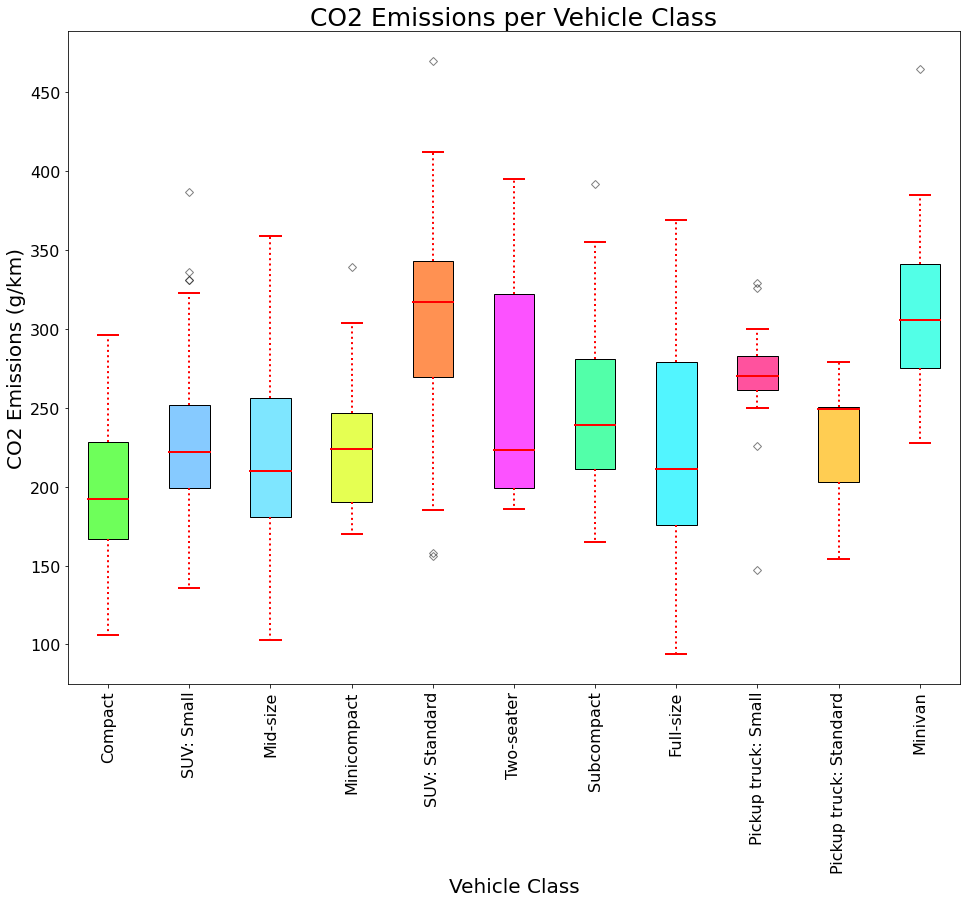

In [199]:
compact = df.loc[df['Vehicle Class'] == 'Compact']['CO2 Emissions (g/km)'].values
suv_small = df.loc[df['Vehicle Class'] == 'SUV: Small']['CO2 Emissions (g/km)'].values
midsize = df.loc[df['Vehicle Class'] == 'Mid-size']['CO2 Emissions (g/km)'].values
minicompact = df.loc[df['Vehicle Class'] == 'Minicompact']['CO2 Emissions (g/km)'].values
suv_stan = df.loc[df['Vehicle Class'] == 'SUV: Standard']['CO2 Emissions (g/km)'].values
twoseat = df.loc[df['Vehicle Class'] == 'Two-seater']['CO2 Emissions (g/km)'].values
subcompact = df.loc[df['Vehicle Class'] == 'Subcompact']['CO2 Emissions (g/km)'].values
fs = df.loc[df['Vehicle Class'] == 'Full-size']['CO2 Emissions (g/km)'].values
pt_small = df.loc[df['Vehicle Class'] == 'Pickup truck: Small']['CO2 Emissions (g/km)'].values
pt_stan = df.loc[df['Vehicle Class'] == 'Pickup truck: Standard']['CO2 Emissions (g/km)'].values
mv = df.loc[df['Vehicle Class'] == 'Minivan']['CO2 Emissions (g/km)'].values
pt_stan = df.loc[df['Vehicle Class'] == 'Pickup truck: Standard']['CO2 Emissions (g/km)'].values
vc = [compact, suv_small, midsize, minicompact, suv_stan, twoseat, subcompact, fs, pt_small, mv, pt_stan]

colors = ['#6EFF5A', '#86CAFF','#7EE6FF', '#E5FF52','#FF9152', '#FC52FF','#52FFA9', '#52F5FF','#FF529E', '#FFCD52','#52FFE7']  
fig = plt.figure(figsize = (16, 12))
bp = plt.boxplot(vc, patch_artist = True)
plt.title("CO2 Emissions per Vehicle Class", fontsize = 25)
plt.ylabel("CO2 Emissions (g/km)", fontsize = 20)
plt.xlabel("Vehicle Class", fontsize = 20)

for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
for whisker in bp['whiskers']: whisker.set(color ='red', linewidth = 2, linestyle =":") 
for cap in bp['caps']: cap.set(color ='red', linewidth = 2) 
for median in bp['medians']: median.set(color ='red', linewidth = 2) 
for flier in bp['fliers']: flier.set(marker ='D', color ='#e7298a', alpha = 0.5) 

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Compact', 'SUV: Small', 'Mid-size', 'Minicompact', 'SUV: Standard', 'Two-seater', 'Subcompact', 'Full-size', 'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan'], rotation = 'vertical')
plt.show()


## Data Analysis: CO2 Emissions per Vehicle Make

The fourth visualization is a box plot that shows the range of CO2 emissions in g/km produced by different vehicle makes. We begin to understand which vehicle makers manufacture vehicles that produce a lot, a little, a wide range, or a narrow range of CO2 emissions. An example of each are Land Rover, MINI, BMW, and Acura. We can also identify which vehicle makers contain outliers such as RAM.

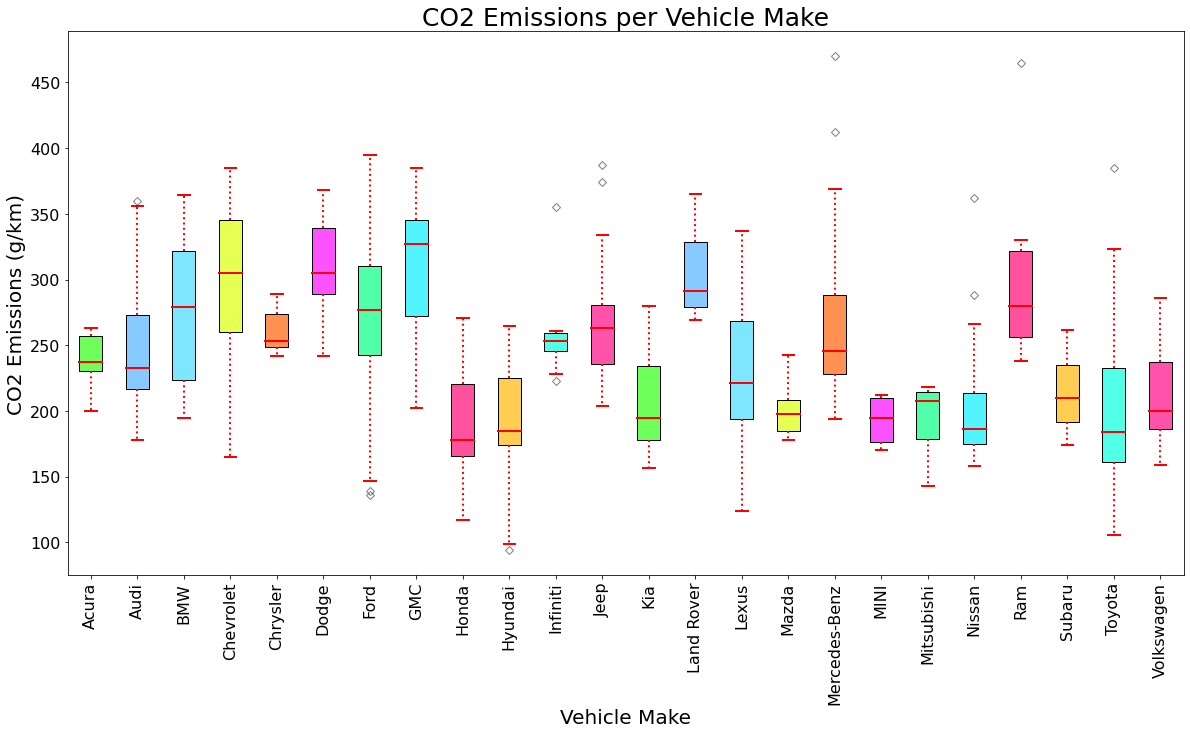

In [200]:
acu = df.loc[df['Make'] == 'Acura']['CO2 Emissions (g/km)'].values
aud = df.loc[df['Make'] == 'Audi']['CO2 Emissions (g/km)'].values
bmw = df.loc[df['Make'] == 'BMW']['CO2 Emissions (g/km)'].values
che = df.loc[df['Make'] == 'Chevrolet']['CO2 Emissions (g/km)'].values
chr = df.loc[df['Make'] == 'Chrysler']['CO2 Emissions (g/km)'].values
dod = df.loc[df['Make'] == 'Dodge']['CO2 Emissions (g/km)'].values
ford = df.loc[df['Make'] == 'Ford']['CO2 Emissions (g/km)'].values
gmc = df.loc[df['Make'] == 'GMC']['CO2 Emissions (g/km)'].values
hon = df.loc[df['Make'] == 'Honda']['CO2 Emissions (g/km)'].values
hyu = df.loc[df['Make'] == 'Hyundai']['CO2 Emissions (g/km)'].values
inf = df.loc[df['Make'] == 'Infiniti']['CO2 Emissions (g/km)'].values
jee = df.loc[df['Make'] == 'Jeep']['CO2 Emissions (g/km)'].values
kia = df.loc[df['Make'] == 'Kia']['CO2 Emissions (g/km)'].values
lan = df.loc[df['Make'] == 'Land Rover']['CO2 Emissions (g/km)'].values
lex = df.loc[df['Make'] == 'Lexus']['CO2 Emissions (g/km)'].values
maz = df.loc[df['Make'] == 'Mazda']['CO2 Emissions (g/km)'].values
mer = df.loc[df['Make'] == 'Mercedes-Benz']['CO2 Emissions (g/km)'].values
mini = df.loc[df['Make'] == 'MINI']['CO2 Emissions (g/km)'].values
mit = df.loc[df['Make'] == 'Mitsubishi']['CO2 Emissions (g/km)'].values
nis = df.loc[df['Make'] == 'Nissan']['CO2 Emissions (g/km)'].values
ram = df.loc[df['Make'] == 'Ram']['CO2 Emissions (g/km)'].values
sub = df.loc[df['Make'] == 'Subaru']['CO2 Emissions (g/km)'].values
toy = df.loc[df['Make'] == 'Toyota']['CO2 Emissions (g/km)'].values
volk = df.loc[df['Make'] == 'Volkswagen']['CO2 Emissions (g/km)'].values

m = [acu, aud, bmw, che, chr, dod, ford, gmc, hon, hyu, inf, jee, kia, lan, lex, maz, mer, mini, mit, nis, ram, sub, toy, volk]

colors = ['#6EFF5A', '#86CAFF','#7EE6FF', '#E5FF52','#FF9152', '#FC52FF','#52FFA9', '#52F5FF','#FF529E', '#FFCD52','#52FFE7', '#FF52AB', '#6EFF5A', '#86CAFF','#7EE6FF', '#E5FF52','#FF9152', '#FC52FF','#52FFA9', '#52F5FF','#FF529E', '#FFCD52','#52FFE7', '#FF52AB']  
fig = plt.figure(figsize = (20, 10))
bp = plt.boxplot(m, patch_artist = True)
plt.title("CO2 Emissions per Vehicle Make", fontsize = 25)
plt.ylabel("CO2 Emissions (g/km)", fontsize = 20)
plt.xlabel("Vehicle Make", fontsize = 20)

for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
for whisker in bp['whiskers']: whisker.set(color ='red', linewidth = 2, linestyle =":") 
for cap in bp['caps']: cap.set(color ='red', linewidth = 2) 
for median in bp['medians']: median.set(color ='red', linewidth = 2) 
for flier in bp['fliers']: flier.set(marker ='D', color ='#e7298a', alpha = 0.5) 

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], ['Acura', 'Audi', 'BMW', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'MINI', 'Mitsubishi', 'Nissan', 'Ram', 'Subaru', 'Toyota', 'Volkswagen'], rotation = 'vertical')
plt.show()


## Data Analysis: Average CO2 Emissions per Vehicle Class and Make

This the final visualization which is the average CO2 emissions per vehicle class and make. We can now identify trends. Fullsize and minicompact vehicles tend to produce more CO2 emissions than midsize and compact. Dodge and GMC vehicles tend to produce more CO2 emissions than Honda and Hyundai. We can tie this visualization back to previous ones to understand the big picture. Insights as well such as a buyer who wants different vehicle options to browse with low CO2 emissions will want to avoid fullsize vehicles because they only make a small proportions of vehicles made in 2022 and also average a high rate of CO2 emissions. 

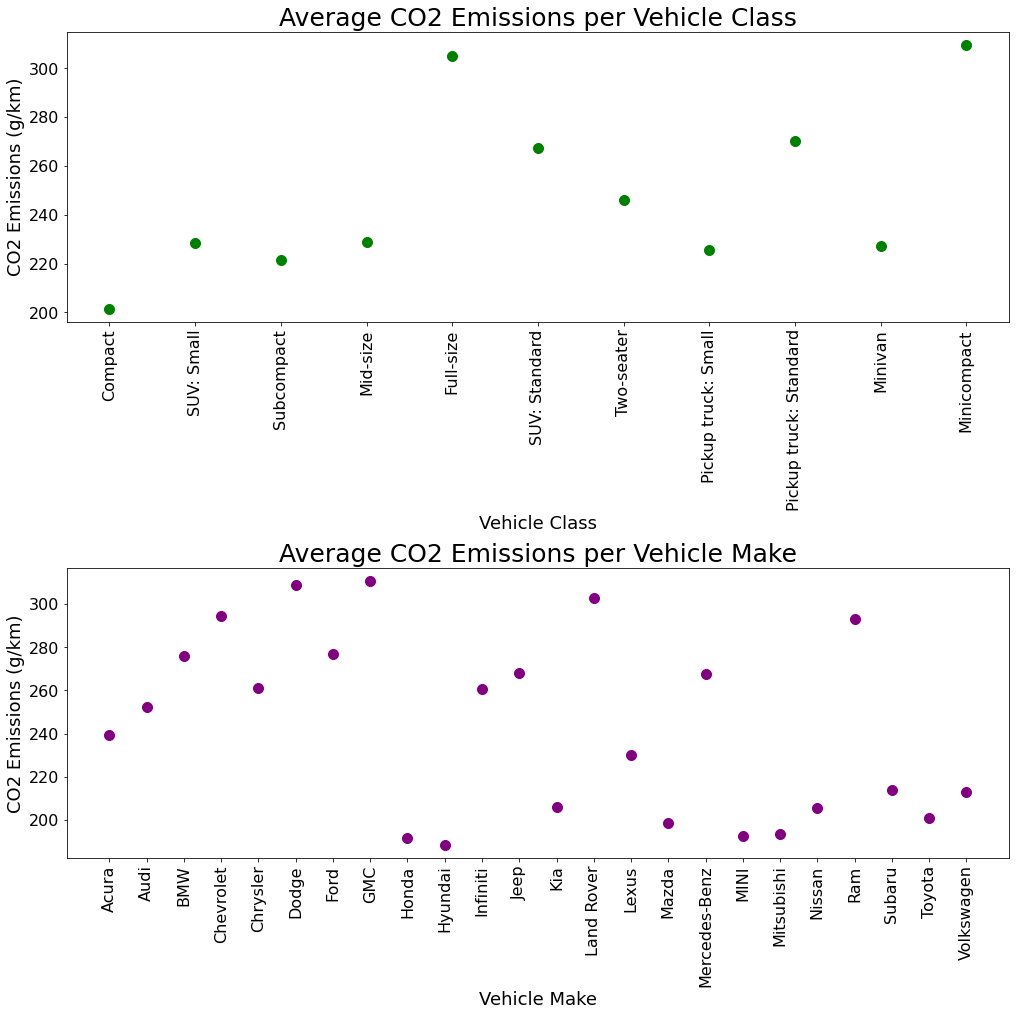

In [201]:
acum = acu.mean()
audm = aud.mean()
bmwm = bmw.mean()
chem = che.mean()
chrm = chr.mean()
dodm = dod.mean()
fordm = ford.mean()
gmcm = gmc.mean()
honm = hon.mean()
hyum = hyu.mean()
infm = inf.mean()
jeem = jee.mean()
kiam = kia.mean()
lanm = lan.mean()
lexm = lex.mean()
mazm = maz.mean()
merm = mer.mean()
minim = mini.mean()
mitm = mit.mean()
nism = nis.mean()
ramm = ram.mean()
subm = sub.mean()
toym = toy.mean()
volkm = volk.mean()

compactm = compact.mean()
suv_smallm = suv_small.mean()
midsizem = midsize.mean()
minicompactm = minicompact.mean()
suv_stanm = suv_stan.mean()
twoseatm = twoseat.mean()
subcompactm = subcompact.mean()
fsm = fs.mean()
pt_smallm = pt_small.mean()
pt_stanm = pt_stan.mean()
mvm = mv.mean()
pt_stanm = pt_stan.mean()

vcm = [compactm, suv_smallm, midsizem, minicompactm, suv_stanm, twoseatm, subcompactm, fsm, pt_smallm, mvm, pt_stanm]
mm = [acum, audm, bmwm, chem, chrm, dodm, fordm, gmcm, honm, hyum, infm, jeem, kiam, lanm, lexm, mazm, merm, minim, mitm, nism, ramm, subm, toym, volkm]

fig, (ax1, ax2) = plt.subplots(2, figsize = (14, 14), constrained_layout = True)

ax1.scatter(['Compact', 'SUV: Small', 'Subcompact', 'Mid-size', 'Full-size', 'SUV: Standard', 'Two-seater', 'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan', 'Minicompact'], vcm, s = 100, c = 'green')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Average CO2 Emissions per Vehicle Class', fontsize = 25)
ax1.set_xlabel('Vehicle Class', fontsize = 18)
ax1.set_ylabel('CO2 Emissions (g/km)', fontsize = 18)

ax2.scatter(['Acura', 'Audi', 'BMW', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'MINI', 'Mitsubishi', 'Nissan', 'Ram', 'Subaru', 'Toyota', 'Volkswagen'], mm, s = 100, c = 'purple')
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Average CO2 Emissions per Vehicle Make', fontsize = 25)
ax2.set_xlabel('Vehicle Make', fontsize = 18)
ax2.set_ylabel('CO2 Emissions (g/km)', fontsize = 18)
plt.show()


## Conclusion

In conclusion, we've created data visualization from our data set to answer our pending question. We've uncovered the vehicle classes and vehicle makes that tend to output high CO2 emissions. We also understand which classes are common and which companies are manufacturing them by cross referencing our data visualizations. We can highlight issues such as Chevrolet's high vehicle emissions paired with their high vehicle production. On the consumer side, those conerned with the environment can make informed decisions about their vehicle purchases.